# Libraries and Dataset

## Libraries

In [40]:
#Generical libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import itertools
from prettytable import PrettyTable

#Loading, preprocessing and splitting the dataset
from urllib.request import urlopen
from collections import Counter
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Perceptron 
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsOneClassifier

#Decision Tree and Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

#Support Vector Machine (SVM)
from sklearn import svm

#Neural Network (NN)
import tensorflow
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical 
from tensorflow.python.framework.random_seed import set_random_seed
from tensorflow.keras.models import Sequential 
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

#K-Nearest Neighbour (kNN)
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Loading Data

Loading and splitting the dataset into train, val and test set: 50000, 10000 and 10000 images respectively. The small dataset is splitted into 10000, 2000 and 2000 examples. 

In [41]:
#Loading the data
def load_fashion_mnist():
    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train_original = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(),dtype=np.uint8, offset=8)
    X_train_original = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(),
                                     dtype=np.uint8, offset=16).reshape(len(Y_train_original), 784)                                                                                         
    X_train ,X_val, Y_train, Y_val = train_test_split(X_train_original, Y_train_original, test_size=0.166666, random_state=42)
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(),dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)
    
    return X_train_original, Y_train_original, X_train, Y_train, X_val, Y_val, X_test, Y_test

#Creating a reduced version of the dataset (small dataset) to speed up the search of hyperparameters
def reduce_dataset(X_train, Y_train, X_val, Y_val, X_test, Y_test,coef=0.2):
    _, X_train_small, _, Y_train_small  = train_test_split(X_train, Y_train, test_size=coef, random_state=42)
    _, X_val_small, _ , Y_val_small  = train_test_split(X_val, Y_val, test_size=coef, random_state=42)
    _, X_test_small, _ ,Y_test_small = train_test_split(X_test, Y_test, test_size=coef, random_state=42)
    return X_train_small, Y_train_small, X_val_small, Y_val_small, X_test_small, Y_test_small

In [42]:
X_train_original, Y_train_original,X_train, Y_train, X_val, Y_val, X_test, Y_test = load_fashion_mnist() 
X_train_small, Y_train_small, X_val_small, Y_val_small, X_test_small, Y_test_small = reduce_dataset(X_train,Y_train, X_val, Y_val, X_test, Y_test,coef=0.2)

## Preprocessing: MinMax and Standard Scaler

Creating two new dataset by preprocessing: the first with MinMax and the second standardizing. Thus the first dataset is now rescaled to [0,1] and the second is distributed as a Gaussian with mean 0 and variance 1. 

In [43]:
#training, validation and test sets rescaled in [0,1] values (wrt the training set)
minmax_scale=MinMaxScaler().fit(X_train)
X_train_minmax=minmax_scale.transform(X_train)
X_val_minmax=minmax_scale.transform(X_val)
X_test_minmax=minmax_scale.transform(X_test)

#training, validation and test sets rescaled in [0,1] values (wrt the training set) small version
minmax_scale_small=MinMaxScaler().fit(X_train)
X_train_small_minmax=minmax_scale.transform(X_train_small)
X_val_small_minmax=minmax_scale.transform(X_val_small)
X_test_small_minmax=minmax_scale.transform(X_test_small)

#training, validation and test sets rescaled with 0 mean 1 std (wrt the training set)
standard=StandardScaler().fit(X_train)
X_train_standard=standard.transform(X_train)
X_val_standard=standard.transform(X_val)
X_test_standard=standard.transform(X_test)

#training, validation and test sets rescaled with 0 mean 1 std (wrt the training set) small version
standard_small=StandardScaler().fit(X_train_small)
X_train_small_standard=standard_small.transform(X_train_small)
X_val_small_standard=standard_small.transform(X_val_small)
X_test_small_standard=standard_small.transform(X_test_small)

It is appropriate to recall all the data we just created.

In [44]:
'''
X_train_original #original training set of 60000 examples
Y_train_original #original labels of the original training set
X_train #training set we are going to use of 50000 examples
Y_train #labesl of X_train 
X_val #validation set of 10000 examples, used to find the optimal hyperparameters
Y_val
X_test #final test set, the original one, provided by Zalando, of 10000 examples
Y_test
X_train_minmax #minmax scaled 
X_val_minmax
X_test_minmax
X_train_standard #standard scaled
X_val_standard
X_test_standard
X_train_small #small version of the training set of 10000 examples
Y_train_small
X_val_small
Y_val_small
X_test_small
Y_test_small
X_train_small_minmax
X_val_small_minmax
X_test_small_minmax
X_train_small_standard
X_val_small_standard
X_test_small_standard
'''

'\nX_train_original #original training set of 60000 examples\nY_train_original #original labels of the original training set\nX_train #training set we are going to use of 50000 examples\nY_train #labesl of X_train \nX_val #validation set of 10000 examples, used to find the optimal hyperparameters\nY_val\nX_test #final test set, the original one, provided by Zalando, of 10000 examples\nY_test\nX_train_minmax #minmax scaled \nX_val_minmax\nX_test_minmax\nX_train_standard #standard scaled\nX_val_standard\nX_test_standard\nX_train_small #small version of the training set of 10000 examples\nY_train_small\nX_val_small\nY_val_small\nX_test_small\nY_test_small\nX_train_small_minmax\nX_val_small_minmax\nX_test_small_minmax\nX_train_small_standard\nX_val_small_standard\nX_test_small_standard\n'

## Statistical Analysis

A bit of analysis of the dataset: shapes, summary of statistics, some pictures. We can see that the classes are quite balanced, in origin the classes were perfectly balanced, we reshuffled the dataset and then splitted it so we lost the perfectly balanced property of the classe (but they are still almost perfectly balanced). 

Shapes of original sets: [(60000, 784), (60000,), (10000, 784), (10000,)]
Shapes of the training, validadtion and test sets: [(50000, 784), (50000,), (10000, 784), (10000,), (10000, 784), (10000,)]
Shapes of the smaller sets: [(10000, 784), (10000,), (2000, 784), (2000,), (2000, 784), (2000,)]
Min of the first example: 0
Max of the first example: 255
Mean of the first example: 32.06505
Means of pixels over the training set: 72.89299
How many examples are in each class, couple (class, number of example):
[(0, 4991), (1, 4998), (2, 5003), (3, 4992), (4, 5003), (5, 4985), (6, 4984), (7, 5053), (8, 4999), (9, 4992)]
[(0, 1009), (1, 1002), (2, 997), (3, 1008), (4, 997), (5, 1015), (6, 1016), (7, 947), (8, 1001), (9, 1008)]
[(0, 1000), (1, 1000), (2, 1000), (3, 1000), (4, 1000), (5, 1000), (6, 1000), (7, 1000), (8, 1000), (9, 1000)]
[(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]


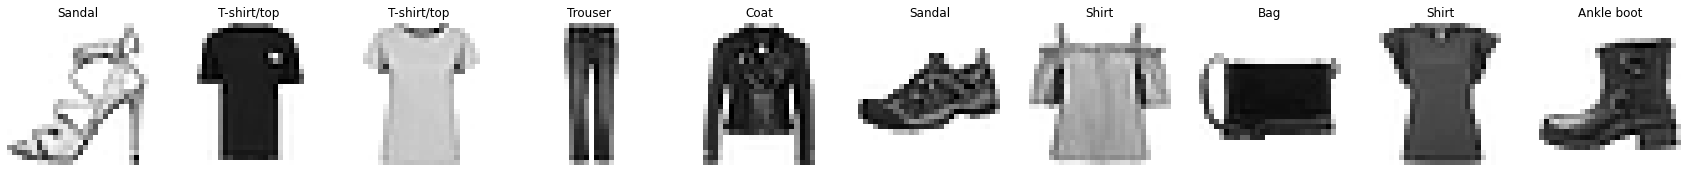

In [45]:
print("Shapes of original sets: %s" %[X_train_original.shape, Y_train_original.shape, X_test.shape, Y_test.shape])
print("Shapes of the training, validadtion and test sets: %s" %[X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape])
print("Shapes of the smaller sets: %s" %[X_train_small.shape, Y_train_small.shape, X_val_small.shape, Y_val_small.shape, X_test_small.shape, Y_test_small.shape])

#value of the data
print(f"Min of the first example: {X_train[0].min()}")
print(f"Max of the first example: {X_train[0].max()}")
print(f"Mean of the first example: {X_train[0].mean():.5f}")
means=[]
for x in X_train:
  means.append(x.mean())
means=np.array(means)
print(f"Means of pixels over the training set: {means.mean():.5f}")
#grayscale goes from 0 to 255

labels_name={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}


print("How many examples are in each class, couple (class, number of example):")
for dataset in [Y_train,Y_val, Y_test, Y_train_original]: #classes are quite balanced, the original one were perfectly balanced
  a=list(Counter(dataset).items())
  a.sort(key=lambda x: x[0], reverse=False)
  print(a)


_, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 9)) #first 10 data from the training set
for ax, x, label in zip(axes,X_train[0:10], Y_train[0:10]):
  ax.set_axis_off()
  X_image=x.reshape(28,28)
  ax.imshow(X_image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("%s" % labels_name[label])

# Perceptron


In [ ]:
def perc_function(small=True,preprocessing=False,learning_rate=1.0,on_test_set=False):

  start_time_perc=time.time()
  accuracy_values_train = []
  accuracy_values_val = []
  accuracy_values_test = []

  if small==True and preprocessing==False:
    clf_perc_small = OneVsOneClassifier(Perceptron(eta0=learning_rate,fit_intercept=True,random_state=123))
    clf_perc_small.fit(X_train_small, Y_train_small)
    y_pred_train_perc = clf_perc_small.predict(X_train_small)
    y_pred_val_perc = clf_perc_small.predict(X_val_small)
    accuracy_values_train.append(accuracy_score(Y_train_small, y_pred_train_perc)) 
    accuracy_values_val.append(accuracy_score(Y_val_small, y_pred_val_perc)) 
    if on_test_set==True:
      accuracy_values_test.append(accuracy_score(Y_test_small, y_pred_test_perc))
      y_pred_test_perc = clf_perc_small.predict(X_test_small)
    print(f"One-vs-One Perceptron classifier")

  if small == True and preprocessing=="Standard":
    clf_perc_small_standard = OneVsOneClassifier(Perceptron(eta0=learning_rate,fit_intercept=True,random_state=123))
    clf_perc_small_standard.fit(X_train_small_standard, Y_train_small)
    y_pred_train_perc_standard = clf_perc_small_standard.predict(X_train_small_standard)
    y_pred_val_perc_standard = clf_perc_small_standard.predict(X_val_small_standard)
    accuracy_values_train.append(accuracy_score(Y_train_small, y_pred_train_perc_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val_small, y_pred_val_perc_standard)) 
    if on_test_set==True:
      y_pred_test_perc_standard = clf_perc_small_standard.predict(X_test_small_standard)
      accuracy_values_test.append(accuracy_score(Y_test_small, y_pred_test_perc_standard))
    print(f"One-vs-One Perceptron classifier with standardized data")

  if small == True and preprocessing=="MinMax":
    clf_perc_small_minmax = OneVsOneClassifier(Perceptron(eta0=learning_rate,fit_intercept=True,random_state=123))
    clf_perc_small_minmax.fit(X_train_small_minmax, Y_train_small)
    y_pred_train_perc_minmax = clf_perc_small_minmax.predict(X_train_small_minmax)
    y_pred_val_perc_minmax = clf_perc_small_minmax.predict(X_val_small_minmax)
    accuracy_values_train.append(accuracy_score(Y_train_small, y_pred_train_perc_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val_small, y_pred_val_perc_minmax)) 
    if on_test_set==True:
      y_pred_test_perc_minmax = clf_perc_small_minmax.predict(X_test_small_minmax)
      accuracy_values_test.append(accuracy_score(Y_test_small, y_pred_test_perc_minmax))
    print(f"One-vs-One Perceptron classifier with MinMax scaled data")

  if small==False and preprocessing==False:
    clf_perc = OneVsOneClassifier(Perceptron(eta0=learning_rate,fit_intercept=True,random_state=123))
    clf_perc.fit(X_train, Y_train)
    y_pred_train_perc = clf_perc.predict(X_train)
    y_pred_val_perc = clf_perc.predict(X_val)
    accuracy_values_train.append(accuracy_score(Y_train, y_pred_train_perc)) 
    accuracy_values_val.append(accuracy_score(Y_val, y_pred_val_perc)) 
    if on_test_set==True:
      y_pred_test_perc = clf_perc.predict(X_test)
      accuracy_values_test.append(accuracy_score(Y_test, y_pred_test_perc))
    print(f"One-vs-One Perceptron classifier")

  if small == False and preprocessing=="Standard":
    clf_perc_standard = OneVsOneClassifier(Perceptron(eta0=learning_rate,fit_intercept=True,random_state=123))
    clf_perc_standard.fit(X_train_standard, Y_train)
    y_pred_train_perc_standard = clf_perc_standard.predict(X_train_standard)
    y_pred_val_perc_standard = clf_perc_standard.predict(X_val_standard)
    accuracy_values_train.append(accuracy_score(Y_train, y_pred_train_perc_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val, y_pred_val_perc_standard)) 
    if on_test_set==True:
      y_pred_test_perc_standard = clf_perc_standard.predict(X_test_standard)
      accuracy_values_test.append(accuracy_score(Y_test, y_pred_test_perc_standard))
    print(f"One-vs-One Perceptron classifier with standardized data")

  if small == False and preprocessing=="MinMax":
    clf_perc_minmax = OneVsOneClassifier(Perceptron(eta0=learning_rate,fit_intercept=True,random_state=123))
    clf_perc_minmax.fit(X_train_minmax, Y_train)
    y_pred_train_perc_minmax = clf_perc_minmax.predict(X_train_minmax)
    y_pred_val_perc_minmax = clf_perc_minmax.predict(X_val_minmax)
    accuracy_values_train.append(accuracy_score(Y_train, y_pred_train_perc_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val, y_pred_val_perc_minmax)) 
    if on_test_set==True:
      y_pred_test_perc_minmax = clf_perc_minmax.predict(X_test_minmax)
      accuracy_values_test.append(accuracy_score(Y_test, y_pred_test_perc_minmax))
    print(f"One-vs-One Perceptron classifier with MinMax scaled data")

  end_time_perc = time.time()
  print("Execution time: {:.5f}".format(end_time_perc-start_time_perc))

  return accuracy_values_train + accuracy_values_val + accuracy_values_test


## Perceptron grid search on small dataset

In [ ]:
acc_train=0
acc_val=0
accuracy_test=[]
optimal_hyperparameters=[]
it_counter=0

results_perc=dict()
start_cycle_for=time.time()
for lr in [0.001,0.002,0.003,0.01,0.02,0.09,0.1,0.11,0.2,0.3,0.4,0.5,0.6,0.8,1.0]:
    for prep in [False, "Standard", "MinMax"]:
      print("Iteration number: {}".format(it_counter+1))
      print("Following iteration is with learning rate: %s, small: %s, preprocessing: %s, on_test_set: %s" %(lr,True,prep,False))
      result=perc_function(learning_rate=lr,small=True,preprocessing=prep,on_test_set=False)
      print("The last iteration's result is: train accuracy = %s, validation accuracy = %s" %(result[0],result[1]))
      if result[1] > acc_val:
        acc_val = result[1]
        acc_train = result[0]
        optimal_hyperparameters = [lr,prep]
        print("Optimal hyperparameters adjusted!")

      it_counter=it_counter+1
      results_perc[(lr,True,prep,False)]=result
      print("-----------------------------------------------------------------------------------------------------------")

end_cycle_for=time.time()
print(results_perc)
print("Optimal parameters are learning rate: {} and preprocessing: {}".format(optimal_hyperparameters[0],optimal_hyperparameters[1]))
print("The optimal parameters produce accuracy train: {} and accuracy validation: {}".format(acc_train,acc_val))
total_execution_time=end_cycle_for-start_cycle_for
print("Total Execution time: {:.5f}".format(total_execution_time))

Iteration number: 1
Following iteration is with learning rate: 0.001, small: True, preprocessing: False, on_test_set: False
One-vs-One Perceptron classifier
Execution time: 4.16921
The last iteration's result is: train accuracy = 0.8459, validation accuracy = 0.794
Optimal hyperparameters adjusted!
-----------------------------------------------------------------------------------------------------------
Iteration number: 2
Following iteration is with learning rate: 0.001, small: True, preprocessing: Standard, on_test_set: False
One-vs-One Perceptron classifier with standardized data
Execution time: 2.60157
The last iteration's result is: train accuracy = 0.9063, validation accuracy = 0.8135
Optimal hyperparameters adjusted!
-----------------------------------------------------------------------------------------------------------
Iteration number: 3
Following iteration is with learning rate: 0.001, small: True, preprocessing: MinMax, on_test_set: False
One-vs-One Perceptron classifier

We just found that the optimal hyperparameters for the perceptron on the small dataset are: learning rate and preprocessing . We can procede to train a perceptron on the whole dataset. 

## Perceptron on the big dataset with the results of the grid search on the small dataset

In [ ]:
start_perc=time.time()
result=perc_function(learning_rate=0.01,small=False,preprocessing="MinMax",on_test_set=True)
print("The result is: train accuracy = %s, validation accuracy = %s, test accuracy: %s" %(result[0],result[1],result[2]))
end_perc=time.time()
total_execution_time=end_perc-start_perc
print("Total Execution time: {:.5f}".format(total_execution_time))

One-vs-One Perceptron classifier with MinMax scaled data
Execution time: 15.36512
The result is: train accuracy = 0.79734, validation accuracy = 0.7765, test accuracy: 0.7705
Total Execution time: 15.36723


## Perceptron grid search on the big dataset

The results are not good enoght, as we expected the validation and the test accuracy on the big dataset (train accuracy = 0.79734, validation accuracy = 0.7765, test accuracy: 0.7705) are smaller than the one on the small dataset (train accuracy = 0.8928, validation accuracy = 0.8155). The problem here is the train accuracy: it is very low, probably the bias is too high. Since the perceptron model is quite fast to train we can try a gridsearch on the big dataset. We evaluate the model on the training set in the grid search so we can see the results right here.

In [ ]:
acc_train = 0
acc_val = 0
acc_test = 0
accuracy_test=[]
optimal_hyperparameters=[]
it_counter=0

results_perc=dict()
start_cycle_for=time.time()
for lr in [0.001,0.01,0.02,0.1,0.2,0.5,1.0]:
    for prep in [False, "Standard", "MinMax"]:
      print("Iteration number: {}".format(it_counter+1))
      print("Following iteration is with learning rate: %s, small: %s, preprocessing: %s, on_test_set: %s" %(lr,False,prep,True))
      result=perc_function(learning_rate=lr,small=False,preprocessing=prep,on_test_set=True)
      print("The last iteration's result is: train accuracy = %s, validation accuracy = %s, test accuracy: %s" %(result[0],result[1],result[2]))
      if result[1] > acc_val:
        acc_test = result[2] 
        acc_val = result[1]
        acc_train = result[0]
        optimal_hyperparameters=[lr,prep]
        print("Optimal hyperparameters adjusted!")

      it_counter+=1
      results_perc[(lr,False,prep,True)]=result
      print("-----------------------------------------------------------------------------------------------------------")

end_cycle_for=time.time()
print(results_perc)
print("Optimal hyperparameters are learning rate: {} and preprocessing: {}".format(optimal_hyperparameters[0],optimal_hyperparameters[1]))
print("The optimal hyperparameters produce accuracy train: {}, accuracy validation: {} and accuracy test".format(acc_train,acc_val,acc_test))
total_execution_time=end_cycle_for-start_cycle_for
print("Total Execution time: {:.5f}".format(total_execution_time))

Iteration number: 1
Following iteration is with learning rate: 0.001, small: False, preprocessing: False, on_test_set: True
One-vs-One Perceptron classifier
Execution time: 24.91294
The last iteration's result is: train accuracy = 0.8383, validation accuracy = 0.8062, test accuracy: 0.8021
Optimal hyperparameters adjusted!
-----------------------------------------------------------------------------------------------------------
Iteration number: 2
Following iteration is with learning rate: 0.001, small: False, preprocessing: Standard, on_test_set: True
One-vs-One Perceptron classifier with standardized data
Execution time: 14.17210
The last iteration's result is: train accuracy = 0.84282, validation accuracy = 0.8058, test accuracy: 0.8033
-----------------------------------------------------------------------------------------------------------
Iteration number: 3
Following iteration is with learning rate: 0.001, small: False, preprocessing: MinMax, on_test_set: True
One-vs-One Perce

After this grid search on the big dataset the optimal hyperparameter found are: learning rate: 0.001 and preprocessing: MinMax. With this hyperparameter the results are train accuracy: 0.84272, validation accuracy: 0.825 and test accuracy: 0.8148. This is not a big improvement, but since the accuracy does not increase over at best 82% then we can say that the problem is in chosing the perceptron. This model is probably too simple for the task.

# k-Nearest Neighbors (kNN)

In [15]:
def knn_function(k_max=10,small=True,preprocessing=False,on_test=False):
  start_time_knn=time.time()
  accuracy_values_train = []
  accuracy_values_val = []
  accuracy_values_test = []
  fib = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 21, 27,30, 34, 40, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657]
  k_values = [k for k in fib if k<=k_max]

  if small==True and preprocessing==False:
    for k in k_values:
      knn= KNeighborsClassifier(n_neighbors = k, n_jobs=-1) # Classifier implementing the k-nearest neighbors vote 
      knn.fit(X_train_small,Y_train_small)  # Fit the k-nearest neighbors classifier from the training dataset
      y_pred_train = knn.predict(X_train_small)   # How are the scores of knn on the training set? it should work ok 
      accuracy_values_train.append(accuracy_score(Y_train_small, y_pred_train)) 
      y_pred_val = knn.predict(X_val_small)   # How are the scores of knn on the val set? Now i can choose the best hyperparameter k 
      accuracy_values_val.append(accuracy_score(Y_val_small, y_pred_val)) 
      if on_test==True: 
        y_pred_test = knn.predict(X_test_small) #unbiased final test 
        accuracy_values_test.append(accuracy_score(Y_test_small, y_pred_test))


  if small==False and preprocessing==False:
    for k in k_values:
      knn= KNeighborsClassifier(n_neighbors = k, n_jobs=-1) # Classifier implementing the k-nearest neighbors vote 
      knn.fit(X_train,Y_train)  # Fit the k-nearest neighbors classifier from the training dataset
      y_pred_train = knn.predict(X_train)   # How are the scores of knn on the training set? it should work ok 
      accuracy_values_train.append(accuracy_score(Y_train, y_pred_train)) 
      y_pred_val = knn.predict(X_val)   # How are the scores of knn on the val set? Now i can choose the best hyperparameter k 
      accuracy_values_val.append(accuracy_score(Y_val, y_pred_val)) 
      if on_test==True: 
        y_pred_test = knn.predict(X_test) #unbiased final test 
        accuracy_values_test.append(accuracy_score(Y_test, y_pred_test))

  if small==True and preprocessing=="MinMax":
    for k in k_values:
      knn= KNeighborsClassifier(n_neighbors = k, n_jobs=-1) # Classifier implementing the k-nearest neighbors vote 
      knn.fit(X_train_small_minmax,Y_train_small)  # Fit the k-nearest neighbors classifier from the training dataset
      y_pred_train = knn.predict(X_train_small_minmax)   # How are the scores of knn on the training set? it should work ok 
      accuracy_values_train.append(accuracy_score(Y_train_small, y_pred_train)) 
      y_pred_val = knn.predict(X_val_small_minmax)   # How are the scores of knn on the val set? Now i can choose the best hyperparameter k 
      accuracy_values_val.append(accuracy_score(Y_val_small, y_pred_val)) 
      if on_test==True: 
        y_pred_test = knn.predict(X_test_small_minmax) #unbiased final test 
        accuracy_values_test.append(accuracy_score(Y_test_small, y_pred_test))
  
  if small==True and preprocessing=="Standard":
    for k in k_values:
      knn= KNeighborsClassifier(n_neighbors = k, n_jobs=-1) # Classifier implementing the k-nearest neighbors vote 
      knn.fit(X_train_small_standard,Y_train_small)  # Fit the k-nearest neighbors classifier from the training dataset
      y_pred_train = knn.predict(X_train_small_standard)   # How are the scores of knn on the training set? it should work ok 
      accuracy_values_train.append(accuracy_score(Y_train_small, y_pred_train)) 
      y_pred_val = knn.predict(X_val_small_standard)   # How are the scores of knn on the val set? Now i can choose the best hyperparameter k 
      accuracy_values_val.append(accuracy_score(Y_val_small, y_pred_val)) 
      if on_test==True: 
        y_pred_test = knn.predict(X_test_small_standard) #unbiased final test 
        accuracy_values_test.append(accuracy_score(Y_test_small, y_pred_test))
  
  if small==False and preprocessing=="MinMax":
    for k in k_values:
      knn= KNeighborsClassifier(n_neighbors = k, n_jobs=-1) # Classifier implementing the k-nearest neighbors vote 
      knn.fit(X_train_minmax,Y_train)  # Fit the k-nearest neighbors classifier from the training dataset
      y_pred_train = knn.predict(X_train_minmax)   # How are the scores of knn on the training set? it should work ok 
      accuracy_values_train.append(accuracy_score(Y_train, y_pred_train)) 
      y_pred_val = knn.predict(X_val_minmax)   # How are the scores of knn on the val set? Now i can choose the best hyperparameter k 
      accuracy_values_val.append(accuracy_score(Y_val, y_pred_val)) 
      if on_test==True: 
        y_pred_test = knn.predict(X_test_minmax) #unbiased final test 
        accuracy_values_test.append(accuracy_score(Y_test, y_pred_test))

  if small==False and preprocessing=="Standard":
    for k in k_values:
      knn= KNeighborsClassifier(n_neighbors = k, n_jobs=-1) # Classifier implementing the k-nearest neighbors vote 
      knn.fit(X_train_standard,Y_train)  # Fit the k-nearest neighbors classifier from the training dataset
      y_pred_train = knn.predict(X_train_standard)   # How are the scores of knn on the training set? it should work ok 
      accuracy_values_train.append(accuracy_score(Y_train, y_pred_train)) 
      y_pred_val = knn.predict(X_val_standard)   # How are the scores of knn on the val set? Now i can choose the best hyperparameter k 
      accuracy_values_val.append(accuracy_score(Y_val, y_pred_val)) 
      if on_test==True: 
        y_pred_test = knn.predict(X_test_standard) #unbiased final test 
        accuracy_values_test.append(accuracy_score(Y_test, y_pred_test))


  #plot
  fig = plt.figure(figsize=(10,8))
  plt.plot(k_values, accuracy_values_train, label="train")
  plt.plot(k_values, accuracy_values_val, label="val")
  if on_test==True: 
    plt.plot(k_values, accuracy_values_test, label="test")
  plt.xlabel("K")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  #result
  k_opt = np.argmax(accuracy_values_val)
  end_time_knn = time.time()
  print("The optimal k is {}".format(k_values[k_opt]))
  print(k_values)
  #print(accuracy_values_train)
  #print(accuracy_values_val)
  tab = PrettyTable()
  tab.field_names = k_values
  tab.add_rows(
      [
          accuracy_values_train,
          accuracy_values_val,
      ]
  )
  if on_test==True: 
    #print(accuracy_values_test)
    tab.add_row(accuracy_values_test)
  print(tab)
  print("Execution time: {:.5f}".format(end_time_knn-start_time_knn))

  if on_test==True: 
    return k_values[k_opt],accuracy_values_train[k_opt],accuracy_values_val[k_opt], accuracy_values_test[k_opt]
  
  return k_values[k_opt],accuracy_values_train[k_opt],accuracy_values_val[k_opt]

## K-NN grid search on the small dataset

As before we procede with a gridsearch on the small dataset. Actually half of the grid seach is in the function, this is wanted to always do a search on the best k. 

Iteration number: 1
Following iteration is: k_max=35, small: True, preprocessing: False


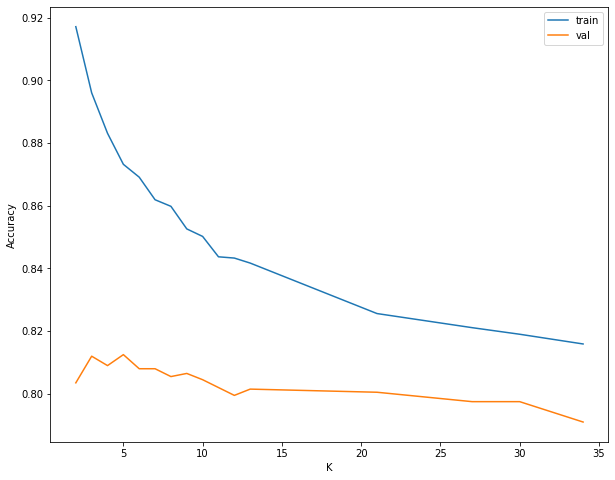

The optimal k is 5
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 21, 27, 30, 34]
+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|   2    |   3   |   4    |   5    |   6    |   7    |   8    |   9    |   10   |   11   |   12   |   13   |   21   |   27   |   30   |   34   |
+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| 0.9171 | 0.896 | 0.8831 | 0.8732 | 0.8691 | 0.8619 | 0.8598 | 0.8526 | 0.8502 | 0.8437 | 0.8433 | 0.8417 | 0.8256 | 0.8211 | 0.819  | 0.8159 |
| 0.8035 | 0.812 | 0.809  | 0.8125 | 0.808  | 0.808  | 0.8055 | 0.8065 | 0.8045 | 0.802  | 0.7995 | 0.8015 | 0.8005 | 0.7975 | 0.7975 | 0.791  |
+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
Execution time: 226.59768
The last iteration's result 

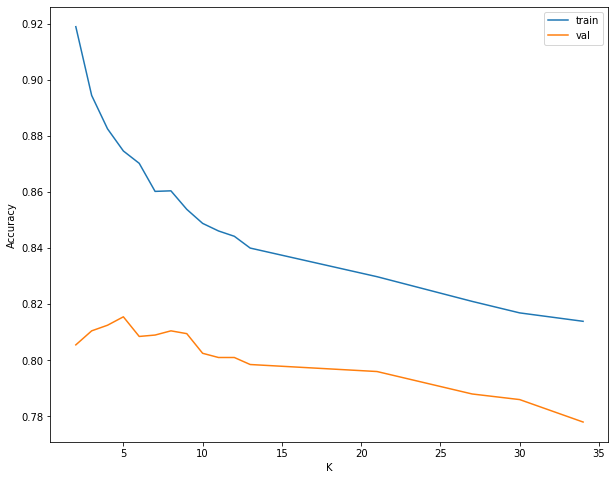

The optimal k is 5
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 21, 27, 30, 34]
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+--------+
|   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   |   11   |   12   |   13   |   21   |   27  |   30   |   34   |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+--------+
| 0.9189 | 0.8944 | 0.8825 | 0.8746 | 0.8702 | 0.8602 | 0.8604 | 0.8538 | 0.8488 | 0.8461 | 0.8442 |  0.84  | 0.8298 | 0.821 | 0.8169 | 0.8139 |
| 0.8055 | 0.8105 | 0.8125 | 0.8155 | 0.8085 | 0.809  | 0.8105 | 0.8095 | 0.8025 | 0.801  | 0.801  | 0.7985 | 0.796  | 0.788 | 0.786  | 0.778  |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+--------+
Execution time: 226.96859
The last iteration's result 

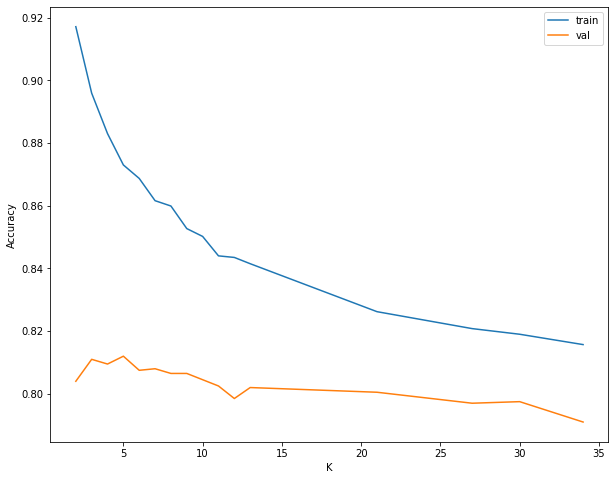

The optimal k is 5
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 21, 27, 30, 34]
+--------+--------+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|   2    |   3    |   4    |   5   |   6    |   7    |   8    |   9    |   10   |   11   |   12   |   13   |   21   |   27   |   30   |   34   |
+--------+--------+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| 0.9171 | 0.8959 | 0.883  | 0.873 | 0.8687 | 0.8616 | 0.8599 | 0.8527 | 0.8502 | 0.844  | 0.8435 | 0.8415 | 0.8262 | 0.8208 | 0.819  | 0.8157 |
| 0.804  | 0.811  | 0.8095 | 0.812 | 0.8075 | 0.808  | 0.8065 | 0.8065 | 0.8045 | 0.8025 | 0.7985 | 0.802  | 0.8005 | 0.797  | 0.7975 | 0.791  |
+--------+--------+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
Execution time: 226.01555
The last iteration's result 

In [ ]:
k_max = 35
results_knn = dict()
it_counter = 0
acc_val = 0
acc_train = 0
k_opt = 0
s = True

for prep in [False, "Standard", "MinMax"]:
  print("Iteration number: {}".format(it_counter+1))
  it_counter+=1
  print("Following iteration is: k_max=%s, small: %s, preprocessing: %s" %(k_max,s,prep))
  result=knn_function(k_max,small=True,preprocessing=prep,on_test=False)
  print("The last iteration's result is: k=%s, train_accuracy=%s, val_accuracy=%s" %(result[0],result[1],result[2]))
  results_knn[(k_max,s,prep)]=result
  if result[2] > acc_val:
        acc_val = result[2]
        acc_train = result[1]
        k_opt = result[0]
        optimal_hyperparameters=[prep]
        print("Optimal hyperparameters adjusted!")
  print("-----------------------------------------------------------------------------------------------------------")

end_cycle_for=time.time()
print(results_knn)
print("Optimal hyperparameter is : {}".format(optimal_hyperparameters[0]))
print("The optimal parameter produce accuracy train: {} and accuracy validation: {}".format(acc_train,acc_val))
total_execution_time=end_cycle_for-start_cycle_for
print("Total Execution time: {:.5f}".format(total_execution_time))

## K_NN on the big dataset

Now we can train a knn classificator on the big dataset with the hyperparameter we found with the grid search on the small dataset: we use k=5 and standard preprocessing. 

In [ ]:
start_knn=time.time()
k = 5


knn= KNeighborsClassifier(n_neighbors = k, n_jobs=-1) # Classifier implementing the k-nearest neighbors vote 
knn.fit(X_train_standard,Y_train)  # Fit the k-nearest neighbors classifier from the training dataset

y_pred_train = knn.predict(X_train_standard)   # How are the scores of knn on the training set? it should work ok 
y_pred_val = knn.predict(X_val_standard)   # How are the scores of knn on the val set? Now i can choose the best hyperparameter k 
y_pred_test = knn.predict(X_test_standard) #unbiased final test 

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_val = accuracy_score(Y_val, y_pred_val)
accuracy_test = accuracy_score(Y_test, y_pred_test)

print("The result is: train accuracy = {:.5f}, validation accuracy = {:.5f}, test accuracy: {:.5f}".format(accuracy_train,accuracy_val,accuracy_test))
end_knn=time.time()
total_execution_time=end_knn-start_knn
print("Total Execution time: {:.5f}".format(total_execution_time))

The result is: train accuracy = 0.89976, validation accuracy = 0.85040, test accuracy: 0.85230
Total Execution time: 328.81750


## Does it change if we do the grid search on the big dataset? Do not run: 3 hours required.

Following iteration is: k_max=10, small: False, preprocessing: False


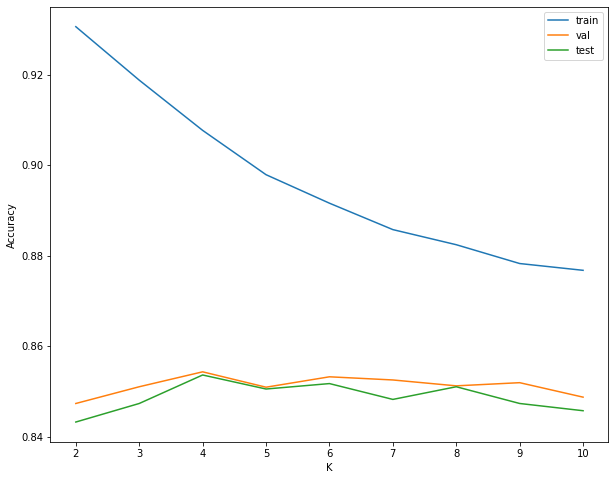

The optimal k is 4
[2, 3, 4, 5, 6, 7, 8, 9, 10]
+--------+---------+---------+---------+---------+---------+--------+---------+---------+
|   2    |    3    |    4    |    5    |    6    |    7    |   8    |    9    |    10   |
+--------+---------+---------+---------+---------+---------+--------+---------+---------+
| 0.9306 | 0.91878 | 0.90768 | 0.89788 | 0.89158 | 0.88574 | 0.8824 | 0.87824 | 0.87674 |
| 0.8473 |  0.851  |  0.8543 |  0.8509 |  0.8532 |  0.8525 | 0.8512 |  0.8519 |  0.8487 |
| 0.8432 |  0.8473 |  0.8536 |  0.8505 |  0.8517 |  0.8482 | 0.851  |  0.8473 |  0.8457 |
+--------+---------+---------+---------+---------+---------+--------+---------+---------+
Execution time: 3134.26167
The result is: k optimal = 4, train accuracy = 0.90768, validation accuracy = 0.85430, test accuracy: 0.85360
Iteration execution time: 3134.27554
Optimal hyperparameter adjusted!
-----------------------------------------------------------------------------------------------------------
Followi

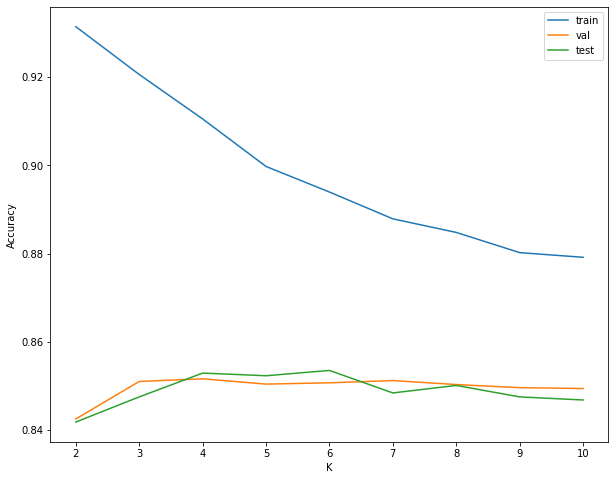

The optimal k is 4
[2, 3, 4, 5, 6, 7, 8, 9, 10]
+---------+---------+---------+---------+---------+---------+--------+---------+---------+
|    2    |    3    |    4    |    5    |    6    |    7    |   8    |    9    |    10   |
+---------+---------+---------+---------+---------+---------+--------+---------+---------+
| 0.93146 | 0.92062 | 0.91054 | 0.89976 | 0.89396 | 0.88788 | 0.8848 | 0.88022 | 0.87916 |
|  0.8425 |  0.851  |  0.8516 |  0.8504 |  0.8507 |  0.8512 | 0.8503 |  0.8496 |  0.8494 |
|  0.8418 |  0.8475 |  0.8529 |  0.8523 |  0.8535 |  0.8484 | 0.8501 |  0.8475 |  0.8468 |
+---------+---------+---------+---------+---------+---------+--------+---------+---------+
Execution time: 3100.45012
The result is: k optimal = 4, train accuracy = 0.91054, validation accuracy = 0.85160, test accuracy: 0.85290
Iteration execution time: 3100.45226
-----------------------------------------------------------------------------------------------------------
Following iteration is: k_max=10,

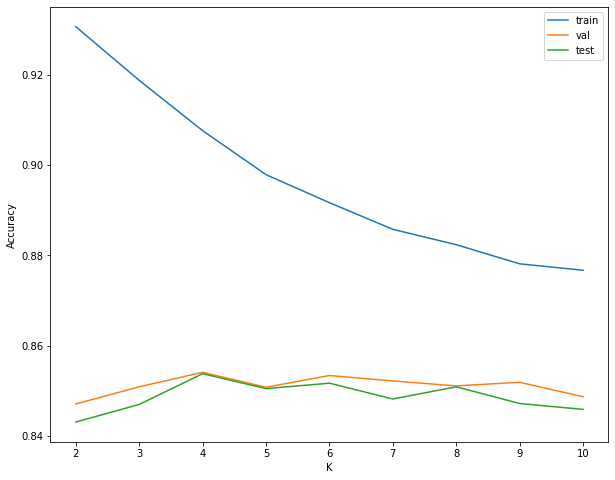

The optimal k is 4
[2, 3, 4, 5, 6, 7, 8, 9, 10]
+---------+---------+--------+---------+---------+---------+---------+---------+--------+
|    2    |    3    |   4    |    5    |    6    |    7    |    8    |    9    |   10   |
+---------+---------+--------+---------+---------+---------+---------+---------+--------+
| 0.93062 | 0.91874 | 0.9076 | 0.89786 | 0.89166 | 0.88576 | 0.88236 | 0.87812 | 0.8767 |
|  0.8471 |  0.8509 | 0.8541 |  0.8508 |  0.8534 |  0.8522 |  0.8511 |  0.8519 | 0.8487 |
|  0.8431 |  0.847  | 0.8538 |  0.8505 |  0.8517 |  0.8482 |  0.8509 |  0.8472 | 0.8459 |
+---------+---------+--------+---------+---------+---------+---------+---------+--------+
Execution time: 3094.09408
The result is: k optimal = 4, train accuracy = 0.90760, validation accuracy = 0.85410, test accuracy: 0.85380
Iteration execution time: 3094.09602
-----------------------------------------------------------------------------------------------------------
{(10, False, False): (4, 0.90768, 0.8543

In [ ]:
k_max=10
results=dict()
start_knn=time.time()
acc_train = 0
acc_val = 0
acc_test = 0
k_opt = 0
optimal_hyperparameter = None

for prep in [False, "Standard", "MinMax"]:
  start_time_it = time.time()
  print("Following iteration is: k_max=%s, small: %s, preprocessing: %s" %(k_max,False,prep))
  result=knn_function(k_max,small=False,preprocessing=prep,on_test=True)
  results[(k_max,False,prep)]=result
  end_time_it = time.time()
  total_time_it = end_time_it-start_time_it
  print("The result is: k optimal = {}, train accuracy = {:.5f}, validation accuracy = {:.5f}, test accuracy: {:.5f}".format(result[0],result[1],result[2],result[3]))
  print("Iteration execution time: {:.5f}".format(total_time_it))
  if result[2] > acc_val:
    k_opt = result[0]
    acc_val = result[2]
    acc_train = result[1]
    acc_test = result[3]
    optimal_hyperparameter = prep
    print("Optimal hyperparameter adjusted!")
  print("-----------------------------------------------------------------------------------------------------------")

print(results)

end_knn=time.time()
total_execution_time=end_knn-start_knn
print("Optimal hyperparameters are k opt: {} and preprocessing: {}".format(k_opt,optimal_hyperparameter))
print("The optimal hyperparameter produces accuracy train: {}, accuracy validation: {} and accuracy test".format(acc_train,acc_val,acc_test))
print("Total Execution time: {:.5f}".format(total_execution_time))


Actually it does change, before we found k=5, now the optimal k is 4. We see that for k = 4 and withoud preprocessing the validation accuracy reaches 0.8543, and in this case the test accuracy is 0.8536. Indeed better than validation accuracy small = 0.85040, test accuracy small: 0.85230; but not really enough better to justify a 3 hours long run. We got less than 0.01 
improvement, this is an empirical confirm that use the small dataset to train an expensive model is a great idea to save time.

# Decision Tree and Random Forest

## Grid searches for Decision Tree and Random Forest on small dataset

We implemented a grid search on the small dataset since on the whole dataset the algorithm is too slow. The optimal hyperparameter we found by the GridSearch should generalize well on the whole dataset.

In [16]:
#Grid Search for the hyperparameters for the Decision Tree
start_time_grid_tree = time.time()
param_grid_test = {'max_depth': [9,10,11,None],
                   'min_samples_leaf': [1,3,4,5,8],
                   'min_samples_split': [18,19,20,21]
                   }
model = tree.DecisionTreeClassifier(random_state=123,criterion='entropy')
clf_tree_search = GridSearchCV(estimator = model, param_grid=param_grid_test, cv = 5, scoring = "accuracy",verbose=0)
clf_tree_search.fit(X_train_small,Y_train_small)
end_time_grid_tree = time.time()
print("Best hyperparameters: {}".format(clf_tree_search.best_params_))
print("Best accuracy score: {:.5f}".format(clf_tree_search.best_score_))
print("Esecution time of the GridSearch: {:.5f}".format(end_time_grid_tree-start_time_grid_tree))

Best hyperparameters: {'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 18}
Best accuracy score: 0.77730
Esecution time of the GridSearch: 2222.82338


In [17]:
#Grid Search for the hyperparameters for the Random Forest
start_time_grid_forest = time.time()
param_grid_test = {'n_estimators':[5,10,50,100], 
                   'max_depth': [5,10,None], 
                   'min_samples_leaf': [1,10],
                   'min_samples_split': [2,10,15]
                   }
model = RandomForestClassifier(random_state=123,criterion='entropy')
clf_random_forest_search = GridSearchCV(estimator = model, param_grid=param_grid_test, cv = 5, scoring = "accuracy",verbose=0)
clf_random_forest_search.fit(X_train_small,Y_train_small)
end_time_grid_forest = time.time()
print("Best hyperparameters: {}".format(clf_random_forest_search.best_params_))
print("Best accuracy score: {:.5f}".format(clf_random_forest_search.best_score_))
print("Esecution time of the GridSearch: {:.5f}".format(end_time_grid_forest-start_time_grid_forest))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score: 0.85950
Esecution time of the GridSearch: 1858.11052


## Grid searches for DT and RF on big dataset (bad idea?)

In [7]:
#Grid Search for the hyperparameters for the Decision Tree
start_time_grid_tree = time.time()
param_grid_test = {'max_depth': [9,10,11,None],
                   'min_samples_leaf': [1,4,8],
                   'min_samples_split': [10,15,20]
                   }
model = tree.DecisionTreeClassifier(random_state=123,criterion='entropy')
clf_tree_search = GridSearchCV(estimator = model, param_grid=param_grid_test, cv = 5, scoring = "accuracy",verbose=0)
clf_tree_search.fit(X_train,Y_train)
end_time_grid_tree = time.time()
print("Best hyperparameters: {}".format(clf_tree_search.best_params_))
print("Best accuracy score: {:.5f}".format(clf_tree_search.best_score_))
print("Esecution time of the GridSearch: {:.5f}".format(end_time_grid_tree-start_time_grid_tree))

Best hyperparameters: {'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 20}
Best accuracy score: 0.81004
Esecution time of the GridSearch: 4281.23837


In [18]:
#Grid Search for the hyperparameters for the Random Forest
start_time_grid_forest = time.time()
param_grid_test = {'n_estimators':[50,100], 
                   'max_depth': [5,None], 
                   'min_samples_leaf': [1,10],
                   'min_samples_split': [2,10]
                   }
model = RandomForestClassifier(random_state=123,criterion='entropy')
clf_random_forest_search = GridSearchCV(estimator = model, param_grid=param_grid_test, cv = 5, scoring = "accuracy",verbose=0)
clf_random_forest_search.fit(X_train,Y_train)
end_time_grid_forest = time.time()
print("Best hyperparameters: {}".format(clf_random_forest_search.best_params_))
print("Best accuracy score: {:.5f}".format(clf_random_forest_search.best_score_))
print("Esecution time of the GridSearch: {:.5f}".format(end_time_grid_forest-start_time_grid_forest))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score: 0.88078
Esecution time of the GridSearch: 3427.12401


## Decision Tree Function

In [37]:
def tree_function(md=11,msl=5,mss=18,small=False,preprocessing=False, confusion=False):
#Best hyperparameters: {'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 20}
  start_time_tree=time.time()
  accuracy_values_train = []
  accuracy_values_val = []
  accuracy_values_test = []

  if small==False and preprocessing==False:
    clf_tree=tree.DecisionTreeClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss )
    clf_tree.fit(X_train,Y_train)
    y_pred_tree_train=clf_tree.predict(X_train) 
    y_pred_tree_val=clf_tree.predict(X_val)
    y_pred_tree_test=clf_tree.predict(X_test)
    print("Decision Tree without preprocessing")
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_tree_train)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_tree_val)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_tree_test))
    if confusion:
      confusion_matrix_tree = confusion_matrix(Y_test, y_pred_tree_test, labels=clf_tree_search.classes_)
      print('TREE: confusion matrix')
      disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_tree, display_labels=clf_tree.classes_)
      disp.plot()
      plt.show()

  if small==False and preprocessing=="MinMax":
    clf_tree_minmax=tree.DecisionTreeClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_tree_minmax.fit(X_train_minmax,Y_train)
    y_pred_tree_train_minmax=clf_tree_minmax.predict(X_train_minmax)
    y_pred_tree_val_minmax=clf_tree_minmax.predict(X_val_minmax)
    y_pred_tree_test_minmax=clf_tree_minmax.predict(X_val_minmax)
    print(f"Decision Tree with minmax scaler data")
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_tree_train_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_tree_val_minmax)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_tree_test_minmax))

  if small==False  and preprocessing=="Standard":
    clf_tree_standard=tree.DecisionTreeClassifier(random_state=123,criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_tree_standard.fit(X_train_standard,Y_train)
    y_pred_tree_train_standard=clf_tree_standard.predict(X_train_standard) 
    y_pred_tree_val_standard=clf_tree_standard.predict(X_val_standard)
    y_pred_tree_test_standard=clf_tree_standard.predict(X_test_standard)
    print("Decision Tree with Standard scaler data")
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_tree_train_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_tree_val_standard)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_tree_test_standard))

  if small==True and preprocessing==False:
    clf_tree_small=tree.DecisionTreeClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss )
    clf_tree_small.fit(X_train_small,Y_train_small)
    y_pred_tree_train_small=clf_tree_small.predict(X_train_small) 
    y_pred_tree_val_small=clf_tree_small.predict(X_val_small)
    y_pred_tree_test_small=clf_tree_small.predict(X_test_small)
    print("Decision Tree on small dataset and without preprocessing")
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_tree_train_small)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_tree_val_small)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_tree_test_small))

  if small==True and preprocessing=="MinMax":
    clf_tree_small_minmax=tree.DecisionTreeClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_tree_small_minmax.fit(X_train_small_minmax,Y_train_small)
    y_pred_tree_train_small_minmax=clf_tree_small_minmax.predict(X_train_small_minmax)
    y_pred_tree_val_small_minmax=clf_tree_small_minmax.predict(X_val_small_minmax)
    y_pred_tree_test_small_minmax=clf_tree_small_minmax.predict(X_test_small_minmax)
    print(f"Decision Tree on small dataset with minmax scaler data")
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_tree_train_small_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_tree_val_small_minmax)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_tree_test_small_minmax))

  if small==True and preprocessing=="Standard":
    clf_tree_small_standard=tree.DecisionTreeClassifier(random_state=123,criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_tree_small_standard.fit(X_train_small_standard,Y_train_small)
    y_pred_tree_train_small_standard=clf_tree_small_standard.predict(X_train_small_standard) 
    y_pred_tree_val_small_standard=clf_tree_small_standard.predict(X_val_small_standard)
    y_pred_tree_test_small_standard=clf_tree_small_standard.predict(X_test_small_standard)
    print(f"Decision Tree on small dataset with Standard scaler data")
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_tree_train_small_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_tree_val_small_standard)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_tree_test_small_standard))

  end_time_tree=time.time()
  print("Execution time: %s" %(end_time_tree-start_time_tree))
  print("Accuracy on the Training set: %s" %accuracy_values_train[0])
  print("Accuracy on the Validation set: %s" %accuracy_values_val[0])
  print("Accuracy on the Test set: %s" %accuracy_values_test[0])

  return accuracy_values_train[0],accuracy_values_val[0], accuracy_values_test[0]


## Decision Tree with max depth: 11, min samples leaf: 5, min samples split: 18

Nowe we can see how the decision tree with hyperparameters max depth: 11, min samples leaf: 5, min samples split: 18
perform on both the small and the big dataset. (atually the small was already done but we add the preprocessing now) 

In [25]:
#small dataset
start_time = time.time()
s = True
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0


for prep in [False,"MinMax","Standard"]:
  start_tree_time = time.time()
  result = tree_function(small=s,preprocessing=prep)
  end_tree_time = time.time()
  if result[1] > acc_val:
        acc_test = result[2]
        acc_val = result[1]
        acc_train = result[0]
        optimal_hyperparameter = prep
        print("Optimal hyperparameters adjusted!")
  #print("Iteration execution time: {:.5f}".format(end_tree_time-start_tree_time))
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

Decision Tree on small dataset and without preprocessing
Execution time: 6.6731061935424805
Accuracy on the Training set: 0.8829
Accuracy on the Validation set: 0.7735
Accuracy on the Test set: 0.776
Optimal hyperparameters adjusted!
-------------------------------------------------------------------
Decision Tree on small dataset with minmax scaler data
Execution time: 6.7036402225494385
Accuracy on the Training set: 0.8829
Accuracy on the Validation set: 0.7735
Accuracy on the Test set: 0.7765
-------------------------------------------------------------------
Decision Tree on small dataset with Standard scaler data
Execution time: 6.755480051040649
Accuracy on the Training set: 0.8829
Accuracy on the Validation set: 0.7735
Accuracy on the Test set: 0.776
-------------------------------------------------------------------
Optimal hyperparameter is : False
The optimal parameter produce accuracy train: 0.8829, accuracy validation: 0.7735 and accuracy test: 0.776
Execution time: 20.1387

In [26]:
#big dataset

start_time = time.time()
s = False
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0


for prep in [False,"MinMax","Standard"]:
  start_tree_time = time.time()
  result = tree_function(small=s,preprocessing=prep)
  end_tree_time = time.time()
  if result[1] > acc_val:
        acc_test = result[2]
        acc_val = result[1]
        acc_train = result[0]
        optimal_hyperparameter = prep
        print("Optimal hyperparameters adjusted!")
  print("Iteration execution time: {:.5f}".format(end_tree_time-start_tree_time))
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

Decision Tree without preprocessing
Execution time: 28.404871463775635
Accuracy on the Training set: 0.85984
Accuracy on the Validation set: 0.8117
Accuracy on the Test set: 0.8071
Optimal hyperparameters adjusted!
Iteration execution time: 28.40511
-------------------------------------------------------------------
Decision Tree with minmax scaler data
Execution time: 27.80117106437683
Accuracy on the Training set: 0.85984
Accuracy on the Validation set: 0.8116
Accuracy on the Test set: 0.1024
Iteration execution time: 27.80139
-------------------------------------------------------------------
Decision Tree with Standard scaler data
Execution time: 27.845151901245117
Accuracy on the Training set: 0.85984
Accuracy on the Validation set: 0.8117
Accuracy on the Test set: 0.8072
Iteration execution time: 27.84539
-------------------------------------------------------------------
Optimal hyperparameter is : False
The optimal parameter produce accuracy train: 0.85984, accuracy validation:

## Decision Tree with max depth: 11, min samples leaf: 8, min samples split: 20

Nowe we can see how the decision tree with hyperparameters max depth: max depth: 11, min samples leaf: 8, min samples split: 20 perform on both the small and the big dataset. (atually the small was already done but we add the preprocessing now)

In [38]:
#small dataset
start_time = time.time()
s = True
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0

for prep in [False,"MinMax","Standard"]:
  start_tree_time = time.time()
  result = tree_function(md=11,msl=8,mss=20, small=s,preprocessing=prep)
  end_tree_time = time.time()
  if result[1] > acc_val:
        acc_test = result[2]
        acc_val = result[1]
        acc_train = result[0]
        optimal_hyperparameter = prep
        print("Optimal hyperparameters adjusted!")
  #print("Iteration execution time: {:.5f}".format(end_tree_time-start_tree_time))
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

Decision Tree on small dataset and without preprocessing
Execution time: 5.478425979614258
Accuracy on the Training set: 0.874
Accuracy on the Validation set: 0.7825
Accuracy on the Test set: 0.776
Optimal hyperparameters adjusted!
-------------------------------------------------------------------
Decision Tree on small dataset with minmax scaler data
Execution time: 6.22128963470459
Accuracy on the Training set: 0.874
Accuracy on the Validation set: 0.7825
Accuracy on the Test set: 0.7765
-------------------------------------------------------------------
Decision Tree on small dataset with Standard scaler data
Execution time: 5.402158498764038
Accuracy on the Training set: 0.874
Accuracy on the Validation set: 0.7825
Accuracy on the Test set: 0.776
-------------------------------------------------------------------
Optimal hyperparameter is : False
The optimal parameter produce accuracy train: 0.874, accuracy validation: 0.7825 and accuracy test: 0.776
Execution time: 17.10413


In [39]:
#big dataset

start_time = time.time()
s = False
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0


for prep in [False,"MinMax","Standard"]:
  start_tree_time = time.time()
  result = tree_function(md=11,msl=8,mss=20, small=s,preprocessing=prep)
  end_tree_time = time.time()
  if result[1] > acc_val:
        acc_test = result[2]
        acc_val = result[1]
        acc_train = result[0]
        optimal_hyperparameter = prep
        print("Optimal hyperparameters adjusted!")
  print("Iteration execution time: {:.5f}".format(end_tree_time-start_tree_time))
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

Decision Tree without preprocessing
Execution time: 23.186370134353638
Accuracy on the Training set: 0.85702
Accuracy on the Validation set: 0.8107
Accuracy on the Test set: 0.807
Optimal hyperparameters adjusted!
Iteration execution time: 23.18926
-------------------------------------------------------------------
Decision Tree with minmax scaler data
Execution time: 22.67177963256836
Accuracy on the Training set: 0.85702
Accuracy on the Validation set: 0.8106
Accuracy on the Test set: 0.1015
Iteration execution time: 22.67195
-------------------------------------------------------------------
Decision Tree with Standard scaler data
Execution time: 22.481699466705322
Accuracy on the Training set: 0.85702
Accuracy on the Validation set: 0.8107
Accuracy on the Test set: 0.8071
Iteration execution time: 22.48295
-------------------------------------------------------------------
Optimal hyperparameter is : False
The optimal parameter produce accuracy train: 0.85702, accuracy validation: 

## Random Forest Function

In [46]:
#Random Forest

def forest_function(n=100,md=None,msl=1,mss=2,small=False,preprocessing=False, confusion=False, example=False):
#Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  start_time_forest=time.time()
  accuracy_values_train = []
  accuracy_values_val = []
  accuracy_values_test = []

  if small==False and preprocessing==False:
    clf_forest=RandomForestClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss )
    clf_forest.fit(X_train,Y_train)
    y_pred_forest_train=clf_forest.predict(X_train) 
    y_pred_forest_val=clf_forest.predict(X_val)
    y_pred_forest_test=clf_forest.predict(X_test)
    print("Random forest without preprocessing")
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_forest_train)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_forest_val)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_forest_test))

    if confusion:
      confusion_matrix_forest = confusion_matrix(Y_test, y_pred_forest_test, labels=clf_random_forest_search.classes_)
      print('FOREST: confusion matrix')
      disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_forest, display_labels=clf_forest.classes_)
      disp.plot()
      plt.show()

    if example:
      indices = np.all([ (Y_val[1100:1500]==6), (y_pred_forest_val[1100:1500]==0) ], axis=0) 
      _, axes = plt.subplots(nrows=1, ncols=sum(indices==True), figsize=(20, 6))
      for ax, x, label, pred_label in zip(axes, X_val[1100:1500][indices], Y_val[1100:1500][indices], y_pred_forest_val[1100:1500][indices]):
        ax.set_axis_off()
        ax.imshow(x.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("True: %s\nPred: %s" % (labels_name[label], labels_name[pred_label]))

  if small==False and preprocessing=="MinMax":
    clf_forest_minmax=RandomForestClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_forest_minmax.fit(X_train_minmax,Y_train)
    y_pred_forest_train_minmax=clf_forest_minmax.predict(X_train_minmax)
    y_pred_forest_val_minmax=clf_forest_minmax.predict(X_val_minmax)
    y_pred_forest_test_minmax=clf_forest_minmax.predict(X_val_minmax)
    print(f"Random forest with minmax scaler data")
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_forest_train_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_forest_val_minmax)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_forest_test_minmax))

  if small==False  and preprocessing=="Standard":
    clf_forest_standard=RandomForestClassifier(random_state=123,criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_forest_standard.fit(X_train_standard,Y_train)
    y_pred_forest_train_standard=clf_forest_standard.predict(X_train_standard) 
    y_pred_forest_val_standard=clf_forest_standard.predict(X_val_standard)
    y_pred_forest_test_standard=clf_forest_standard.predict(X_test_standard)
    print("Random forest with Standard scaler data")
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_forest_train_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_forest_val_standard)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_forest_test_standard))

  if small==True and preprocessing==False:
    clf_forest_small=RandomForestClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss )
    clf_forest_small.fit(X_train_small,Y_train_small)
    y_pred_forest_train_small=clf_forest_small.predict(X_train_small) 
    y_pred_forest_val_small=clf_forest_small.predict(X_val_small)
    y_pred_forest_test_small=clf_forest_small.predict(X_test_small)
    print("Random forest on small dataset and without preprocessing")
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_forest_train_small)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_forest_val_small)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_forest_test_small))

  if small==True and preprocessing=="MinMax":
    clf_forest_small_minmax=RandomForestClassifier(random_state=123, criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_forest_small_minmax.fit(X_train_small_minmax,Y_train_small)
    y_pred_forest_train_small_minmax=clf_forest_small_minmax.predict(X_train_small_minmax)
    y_pred_forest_val_small_minmax=clf_forest_small_minmax.predict(X_val_small_minmax)
    y_pred_forest_test_small_minmax=clf_forest_small_minmax.predict(X_test_small_minmax)
    print(f"Random forest on small dataset with minmax scaler data")
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_forest_train_small_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_forest_val_small_minmax)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_forest_test_small_minmax))

  if small==True and preprocessing=="Standard":
    clf_forest_small_standard=RandomForestClassifier(random_state=123,criterion='entropy', max_depth = md, min_samples_leaf = msl, min_samples_split = mss ) 
    clf_forest_small_standard.fit(X_train_small_standard,Y_train_small)
    y_pred_forest_train_small_standard=clf_forest_small_standard.predict(X_train_small_standard) 
    y_pred_forest_val_small_standard=clf_forest_small_standard.predict(X_val_small_standard)
    y_pred_forest_test_small_standard=clf_forest_small_standard.predict(X_test_small_standard)
    print(f"Random forest on small dataset with Standard scaler data")
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_forest_train_small_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_forest_val_small_standard)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_forest_test_small_standard))

  end_time_forest=time.time()
  print("Execution time: %s" %(end_time_forest-start_time_forest))
  print("Accuracy on the Training set: %s" %accuracy_values_train[0])
  print("Accuracy on the Validation set: %s" %accuracy_values_val[0])
  print("Accuracy on the Test set: %s" %accuracy_values_test[0])

  return accuracy_values_train[0],accuracy_values_val[0], accuracy_values_test[0]


## Random forest with number of estimators: 100, max depth: None, min samples leaf: 1, min samples split: 2

Now we will see how the Random forest goes on the small dataset.

In [28]:
#big dataset

start_time = time.time()
s = True
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0
optimal_hyperparameter = None

for prep in [False,"MinMax","Standard"]:
  result = forest_function(small=s,preprocessing=prep)
  end_tree_time = time.time()
  if result[1] > acc_val:
    acc_test = result[2]
    acc_val = result[1]
    acc_train = result[0]
    optimal_hyperparameter = prep
  print("Optimal hyperparameter adjusted!")
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

Random forest on small dataset and without preprocessing
Execution time: 21.969738721847534
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.8655
Accuracy on the Test set: 0.8545
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Random forest on small dataset with minmax scaler data
Execution time: 21.983783960342407
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.866
Accuracy on the Test set: 0.8545
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Random forest on small dataset with Standard scaler data
Execution time: 21.993972778320312
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.864
Accuracy on the Test set: 0.8545
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Optimal hyperparameter is : MinMax
The optimal parameter produce accuracy train: 1.0, accuracy validation: 

As we just did but on the big dataset.

In [30]:
#big dataset

start_time = time.time()
s = False
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0
optimal_hyperparameter = None

for prep in [False,"MinMax","Standard"]:
  result = forest_function(small=s,preprocessing=prep)
  end_tree_time = time.time()
  if result[1] > acc_val:
    acc_test = result[2]
    acc_val = result[1]
    acc_train = result[0]
    optimal_hyperparameter = prep
  print("Optimal hyperparameter adjusted!")
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

Random forest without preprocessing
Execution time: 122.8397376537323
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.8815
Accuracy on the Test set: 0.8766
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Random forest with minmax scaler data
Execution time: 124.05996823310852
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.8812
Accuracy on the Test set: 0.1026
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Random forest with Standard scaler data
Execution time: 121.70955538749695
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.8814
Accuracy on the Test set: 0.8767
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Optimal hyperparameter is : False
The optimal parameter produce accuracy train: 1.0, accuracy validation: 0.8815 and accuracy test: 0.8766
Execution time: 368.67

## Random forest: one try with max depth small

The next iteration is with max depth: 4
Random forest without preprocessing
Execution time: 19.676917791366577
Accuracy on the Training set: 0.74838
Accuracy on the Validation set: 0.7432
Accuracy on the Test set: 0.7363
Iteration Execution time: 19.67722
-------------------------------------------------------------------
The next iteration is with max depth: 5
Random forest without preprocessing
Execution time: 25.070387840270996
Accuracy on the Training set: 0.76634
Accuracy on the Validation set: 0.7605
Accuracy on the Test set: 0.7527
Iteration Execution time: 25.07063
-------------------------------------------------------------------
The next iteration is with max depth: 6
Random forest without preprocessing
Execution time: 32.120248317718506
Accuracy on the Training set: 0.80546
Accuracy on the Validation set: 0.7955
Accuracy on the Test set: 0.7914
Iteration Execution time: 32.12115
-------------------------------------------------------------------
The next iteration is with m

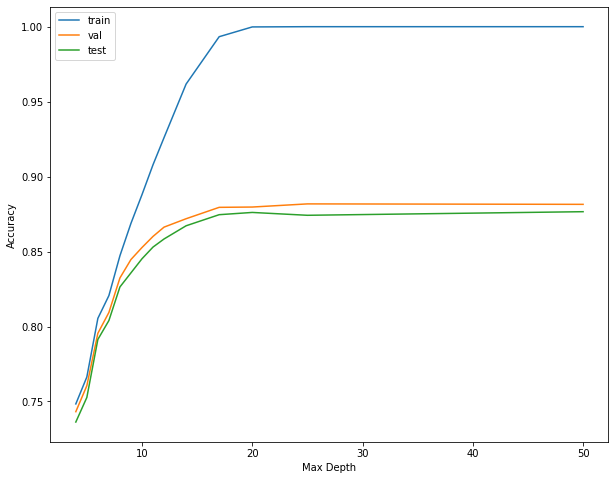

Execution time: 846.87710


In [53]:
#big dataset

depths = [4,5,6,7,8,9,10,11,12,14,17,20,25,50]
acc_train = []
acc_val = []
acc_test = []
start_start_time = time.time()

#accuracy_values_train[0],accuracy_values_val[0], accuracy_values_test[0]

for maximumdepth in depths:
  print("The next iteration is with max depth: {}".format(maximumdepth))
  start_time = time.time()
  result = forest_function(md=maximumdepth,small=False,preprocessing=False)
  acc_test.append(result[2])
  acc_val.append(result[1])
  acc_train.append(result[0])
  end_time = time.time()
  print("Iteration Execution time: {:.5f}".format(end_time-start_time))
  print("-------------------------------------------------------------------")


#plot
fig = plt.figure(figsize=(10,8))
plt.plot(depths, acc_train, label="train")
plt.plot(depths, acc_val, label="val")
plt.plot(depths, acc_test, label="test")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

end_end_time = time.time() 
print("Execution time: {:.5f}".format(end_end_time-start_start_time))



## Confusion Matrices and misclassification example

Let's study the confusion matrices of decision tree and random forest. We can see that class 0 and 6 are sometimes confused.

Decision Tree without preprocessing
TREE: confusion matrix


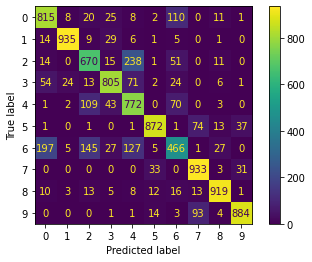

Execution time: 32.94416046142578
Accuracy on the Training set: 0.85984
Accuracy on the Validation set: 0.8117
Accuracy on the Test set: 0.8071
-----------------------------------------------------------
Random forest without preprocessing
FOREST: confusion matrix


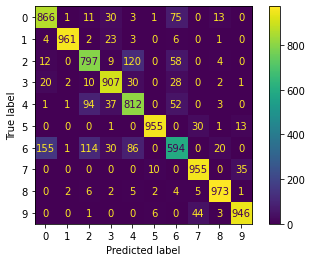

Execution time: 119.71531796455383
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.8815
Accuracy on the Test set: 0.8766


(1.0, 0.8815, 0.8766)

In [31]:
tree_function(small=False, preprocessing=False, confusion=True)
print("-----------------------------------------------------------")
forest_function(small=False, preprocessing= False, confusion=True)

We can see that some Shirt is confused with T-shirt/top

Random forest without preprocessing
Execution time: 120.57630753517151
Accuracy on the Training set: 1.0
Accuracy on the Validation set: 0.8815
Accuracy on the Test set: 0.8766


(1.0, 0.8815, 0.8766)

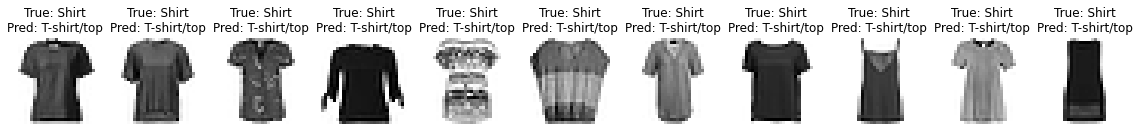

In [32]:
forest_function(small=False, preprocessing= False, example=True)

# Support Vector Machine

## Grid Search for SVM

As usual, we do a grid search on the small dataset.

In [39]:
svc_grid_params = {'C': ( 0.1, 1, 10, 100),'kernel': ('rbf', 'linear')}
start_time_grid_svm = time.time()
model = svm.SVC(random_state = 123)
clf_svm = GridSearchCV(estimator = model,param_grid = svc_grid_params, scoring='accuracy',n_jobs= -1, cv = 5, verbose = 1)
clf_svm.fit(X_train_small,Y_train_small)
end_time_grid_svm = time.time()
print("Best hyperparameters: {}".format(clf_svm.best_params_))
print("Best accuracy score: {:.5f}".format(clf_svm.best_score_))
print("Esecution time of the GridSearch: {:.5f}".format(end_time_grid_svm-start_time_grid_svm))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best accuracy score: 0.87230
Esecution time of the GridSearch: 658.64441


## SVM on the big dataset with the hyperparameter found from the smaller dataset

In [7]:
def svm_function(small=False, preprocessing=False, ker='rbf', c_hpar=10):
  start_time_svm=time.time()
  accuracy_values_train = []
  accuracy_values_val = []
  accuracy_values_test = []

  if small==False and preprocessing==False:
    clf_svm=svm.SVC(random_state = 123, kernel = ker, C=c_hpar)
    clf_svm.fit(X_train,Y_train)
    print("SVM without preprocessing")
    y_pred_svm_train=clf_svm.predict(X_train) 
    y_pred_svm_val=clf_svm.predict(X_val) 
    y_pred_svm_test=clf_svm.predict(X_test) 
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_svm_train)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_svm_val)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_svm_test))
  
  if small==False and preprocessing=="MinMax":
    clf_svm_minmax=svm.SVC(random_state = 123, kernel = ker, C=c_hpar)
    clf_svm_minmax.fit(X_train_minmax,Y_train)
    print("SVM with MinMax preprocessing")
    y_pred_svm_train_minmax=clf_svm_minmax.predict(X_train_minmax) 
    y_pred_svm_val_minmax=clf_svm_minmax.predict(X_val_minmax)
    y_pred_svm_test_minmax=clf_svm_minmax.predict(X_test_minmax)
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_svm_train_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_svm_val_minmax)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_svm_test_minmax))

  if small==False and preprocessing=="Standard":
    clf_svm_standard=svm.SVC(random_state = 123, kernel = ker, C=c_hpar)
    clf_svm_standard.fit(X_train_standard,Y_train)
    print("SVM with Standard Scaler preprocessing")
    y_pred_svm_train_standard=clf_svm_standard.predict(X_train_standard) 
    y_pred_svm_val_standard=clf_svm_standard.predict(X_val_standard)
    y_pred_svm_test_standard=clf_svm_standard.predict(X_test_standard)
    accuracy_values_train.append(accuracy_score(Y_train,y_pred_svm_train_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val,y_pred_svm_val_standard)) 
    accuracy_values_test.append(accuracy_score(Y_test,y_pred_svm_test_standard))

  if small==True and preprocessing==False:
    clf_svm=svm.SVC(random_state = 123, kernel = ker, C=c_hpar)
    clf_svm.fit(X_train_small,Y_train_small)
    print("SVM on small dataset without preprocessing")
    y_pred_svm_train=clf_svm.predict(X_train_small) 
    y_pred_svm_val=clf_svm.predict(X_val_small) 
    y_pred_svm_test=clf_svm.predict(X_test_small) 
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_svm_train)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_svm_val)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_svm_test))
  
  if small==True and preprocessing=="MinMax":
    clf_svm_minmax=svm.SVC(random_state = 123, kernel = ker, C=c_hpar)
    clf_svm_minmax.fit(X_train_small_minmax,Y_train_small)
    print("SVM on small dataset with MinMax preprocessing")
    y_pred_svm_train_minmax=clf_svm_minmax.predict(X_train_small_minmax) 
    y_pred_svm_val_minmax=clf_svm_minmax.predict(X_val_small_minmax)
    y_pred_svm_test_minmax=clf_svm_minmax.predict(X_test_small_minmax)
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_svm_train_minmax)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_svm_val_minmax)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_svm_test_minmax))

  if small==True and preprocessing=="Standard":
    clf_svm_standard=svm.SVC(random_state = 123, kernel = ker, C=c_hpar)
    clf_svm_standard.fit(X_train_small_standard,Y_train_small)
    print("SVM on small dataset with Standard Scaler preprocessing")
    y_pred_svm_train_standard=clf_svm_standard.predict(X_train_small_standard) 
    y_pred_svm_val_standard=clf_svm_standard.predict(X_val_small_standard)
    y_pred_svm_test_standard=clf_svm_standard.predict(X_test_small_standard)
    accuracy_values_train.append(accuracy_score(Y_train_small,y_pred_svm_train_standard)) 
    accuracy_values_val.append(accuracy_score(Y_val_small,y_pred_svm_val_standard)) 
    accuracy_values_test.append(accuracy_score(Y_test_small,y_pred_svm_test_standard))

  end_time_svm=time.time()
  print("Execution time: %s" %(end_time_svm-start_time_svm))
  print("Accuracy on the Training set: %s" %accuracy_values_train[0])
  print("Accuracy on the Validation set: %s" %accuracy_values_val[0])
  print("Accuracy on the Test set: %s" %accuracy_values_test[0])

  return accuracy_values_train[0],accuracy_values_val[0], accuracy_values_test[0]


Now we can see which is the best preprocessing both on the small dataset and the big dataset.

In [8]:
#small dataset
start_time = time.time()
s = True
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0
optimal_hyperparameter = None

for prep in [False,"MinMax","Standard"]:
  start_svm_time = time.time()
  result = svm_function(small = s, preprocessing = prep)
  end_svm_time = time.time()
  if result[1] > acc_val:
    acc_test = result[2]
    acc_val = result[1]
    acc_train = result[0]
    optimal_hyperparameter = prep
  print("Iteration execution time: {:.5f}".format(end_svm_time - start_svm_time))
  print("Optimal hyperparameter adjusted!")
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

SVM on small dataset without preprocessing
Execution time: 66.18803215026855
Accuracy on the Training set: 0.9836
Accuracy on the Validation set: 0.867
Accuracy on the Test set: 0.8655
Iteration execution time: 66.18972
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
SVM on small dataset with MinMax preprocessing
Execution time: 63.35159134864807
Accuracy on the Training set: 0.9836
Accuracy on the Validation set: 0.8665
Accuracy on the Test set: 0.866
Iteration execution time: 63.35297
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
SVM on small dataset with Standard Scaler preprocessing
Execution time: 74.01190423965454
Accuracy on the Training set: 0.992
Accuracy on the Validation set: 0.867
Accuracy on the Test set: 0.8685
Iteration execution time: 74.01341
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Optimal hyperparamete

In [10]:
#big dataset
start_time = time.time()
s = False
acc_val = 0
acc_train = 0
acc_test = 0
k_opt = 0
optimal_hyperparameter = None

for prep in [False,"MinMax","Standard"]:
  start_svm_time = time.time()
  result = svm_function(small = s, preprocessing = prep)
  end_svm_time = time.time()
  if result[1] > acc_val:
    acc_test = result[2]
    acc_val = result[1]
    acc_train = result[0]
    optimal_hyperparameter = prep
  print("Iteration execution time: {:.5f}".format(end_svm_time - start_svm_time))
  print("Optimal hyperparameter adjusted!")
  print("-------------------------------------------------------------------")

print("Optimal hyperparameter is : {}".format(optimal_hyperparameter))
print("The optimal parameter produce accuracy train: {}, accuracy validation: {} and accuracy test: {}".format(acc_train,acc_val,acc_test))
end_time = time.time() 
print("Execution time: {:.5f}".format(end_time-start_time))

SVM without preprocessing
Execution time: 1232.4764335155487
Accuracy on the Training set: 0.97226
Accuracy on the Validation set: 0.9028
Accuracy on the Test set: 0.8968
Iteration execution time: 1232.47809
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
SVM with MinMax preprocessing
Execution time: 1250.6362221240997
Accuracy on the Training set: 0.9723
Accuracy on the Validation set: 0.9027
Accuracy on the Test set: 0.8967
Iteration execution time: 1250.63948
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
SVM with Standard Scaler preprocessing
Execution time: 1396.8828871250153
Accuracy on the Training set: 0.98288
Accuracy on the Validation set: 0.9026
Accuracy on the Test set: 0.8953
Iteration execution time: 1396.88497
Optimal hyperparameter adjusted!
-------------------------------------------------------------------
Optimal hyperparameter is : False
The optimal parameter p

What if we try a grid search on the big dataset?

In [ ]:
svc_grid_params = {'C': ( 0.1, 1, 10, 100),'kernel': ('rbf', 'linear')}
start_time_grid_svm = time.time()
model = svm.SVC(random_state = 123)
clf_svm = GridSearchCV(estimator = model,param_grid = svc_grid_params, scoring='accuracy',n_jobs= -1, cv = 5, verbose = 1)
clf_svm.fit(X_train,Y_train,n_jobs= -1)
end_time_grid_svm = time.time()
print("Best hyperparameters: {}".format(clf_svm.best_params_))
print("Best accuracy score: {:.5f}".format(clf_svm.best_score_))
print("Esecution time of the GridSearch: {:.5f}".format(end_time_grid_svm-start_time_grid_svm))

If the last grid search is fast enoght we can try to train an svm on the big dataset with the hyperparameters just found. Unlucky it does not run (3 hours time and an error).

# Neural Network

In [54]:
#transorming data labels into categorical
Y_train_original_cat=to_categorical(Y_train_original,10)
Y_train_cat=to_categorical(Y_train,10)
Y_val_cat=to_categorical(Y_val,10)
Y_test_cat=to_categorical(Y_test,10)
Y_train_small_cat=to_categorical(Y_train_small,10)
Y_val_small_cat=to_categorical(Y_val_small,10)
Y_test_small_cat=to_categorical(Y_test_small,10)

Note that in order that the NN works with keras data have to be scaled, so we are not using unpreprocessed data.

## Grid Seach on NNs on small dataset

In [55]:
#function for define and train many NN, 
#then see which one is the best on the validation set and then use it on the whole batch 
#finally testing it on the test set

def nn_creator(X, #training set (must be scaled before)
               Y, #training set labels (not yet to_categorical)
               vec_nodes=[400,100], 
               n_epochs = 30, 
               stop = True, #T/F
               n_patience = 3, #number of epochs without improvements 
               opt='sgd', #optimized (can choose 'sgd', 'adam', 'rmsprop')
               dropout_prob =0.2, #Regularization dropout (removing node with prob 0.2)
               n_batch_size = 16,
               ): 
               
    features=np.shape(X)[1]
    num_classes=len(set(Y))
    
    np.random.seed(17)
    set_random_seed(2)

    #EarlyStopping
    if stop=='True':
      early_stopping=EarlyStopping(monitor='val_loss', #quantity to be monitored
                    mode='min', #we look for decreasing patterns stop 
                    patience = n_patience, #number of epochs with no improvements
                    verbose=1)
    else:
      early_stopping=None
    
    model=Sequential()
    n_layers=len(vec_nodes)
    if n_layers==0:
      model.add(Dense(input_dim=features, 
                      units = num_classes, 
                      activation= 'softmax'))
    else:
      for i in range(n_layers):
        if i==0:
          model.add(Dense(input_dim=features,
                          units=vec_nodes[0],
                          activation='relu'))
        else: 
          model.add(Dropout(dropout_prob))
          model.add(Dense(units=vec_nodes[i],
                          activation='relu'))
      model.add(Dense(units = num_classes, 
                      activation= 'softmax'))
    
    #configure the model
    model.compile(loss='categorical_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy']) 

    #training
    Y=to_categorical(Y,num_classes)
    train=model.fit(X,Y,epochs=n_epochs,
                    batch_size=n_batch_size, 
                    verbose=0,
                    validation_split=0.1,
                    callbacks=early_stopping)
    
    return model,train

Accuracy: 0.86000, Execution time: 77.29 -- Standard with epochs: 100, vector nodes: (784,), patince: 5, optimizator: adam, dropout: 0.2, batch size: 256
Omptimal hyperparameters adjusted!
Just ended the analysis of model number: 1
----------------------------------------------------
Accuracy: 0.85850, Execution time: 77.44 -- Standard with epochs: 100, vector nodes: (784, 10), patince: 5, optimizator: adam, dropout: 0.2, batch size: 256
Just ended the analysis of model number: 2
----------------------------------------------------
Accuracy: 0.86200, Execution time: 1134.16 -- Standard with epochs: 100, vector nodes: (784, 10000), patince: 5, optimizator: adam, dropout: 0.2, batch size: 256
Omptimal hyperparameters adjusted!
Just ended the analysis of model number: 3
----------------------------------------------------
Accuracy: 0.84550, Execution time: 223.87 -- Standard with epochs: 100, vector nodes: (784, 382, 382, 10), patince: 5, optimizator: adam, dropout: 0.2, batch size: 256
J

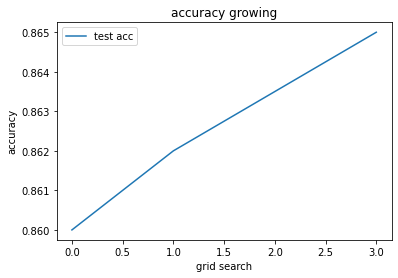

{('Standard', 100, (784,), 5, 'adam', 0.2, 256): 0.8600000143051147, ('Standard', 100, (784, 10), 5, 'adam', 0.2, 256): 0.8585000038146973, ('Standard', 100, (784, 10000), 5, 'adam', 0.2, 256): 0.8619999885559082, ('Standard', 100, (784, 382, 382, 10), 5, 'adam', 0.2, 256): 0.8454999923706055, ('MinMax', 100, (784,), 5, 'adam', 0.2, 256): 0.8634999990463257, ('MinMax', 100, (784, 10), 5, 'adam', 0.2, 256): 0.859499990940094, ('MinMax', 100, (784, 10000), 5, 'adam', 0.2, 256): 0.8604999780654907, ('MinMax', 100, (784, 382, 382, 10), 5, 'adam', 0.2, 256): 0.8650000095367432}


In [ ]:
'''
vec_nodes_list=[[784],[784,10]]
n_epochs_list=[100,500]
n_patience_list=[5,15,25]
opt_list=['sgd','adam','rmsprop']
dropout_prob_list = [0,0.2,0.5]
batch_size_list = [64,128,256]
preprocessing_list = ["Standard","MinMax"]
'''
'''
Accuracy: 0.86650, Execution time: 46.09 -- MinMax with epochs: 100, vector nodes: (784,), patince: 5, optimizator: adam, dropout: 0, batch size: 256
Accuracy: 0.86650, Execution time: 80.53 -- Standard with epochs: 100, vector nodes: (784,), patince: 5, optimizator: adam, dropout: 0, batch size: 128
'''

vec_nodes_list=[[784],[784,10],[784,10000],[784,382,382,10]]
n_epochs_list=[100]
n_patience_list=[5]
opt_list=['adam']
dropout_prob_list = [0.2]
batch_size_list = [256]
preprocessing_list = ["Standard","MinMax"]

grid = list(itertools.product(preprocessing_list,vec_nodes_list,n_epochs_list,n_patience_list,opt_list,dropout_prob_list,batch_size_list))

#lets save the maximum accuracy
acc=0
accuracy_test=[]
i=0
search_results=dict()

#grid-search
for elem in grid: 
  preproc = elem[0]
  v = elem[1]
  n_ep = elem[2]
  n_pat = elem[3]
  optim = elem[4]
  dop = elem[5]
  bs = elem[6]
  iteration_start_time = time.time()
  if preproc == "MinMax":
    nn_model, nn_train = nn_creator(X=X_train_small_minmax, Y=Y_train_small, vec_nodes=v, 
                                    n_epochs=n_ep, stop = True, n_patience = n_pat, opt = optim, dropout_prob = dop, n_batch_size = bs)
  if preproc == "Standard":
    nn_model, nn_train = nn_creator(X=X_train_small_standard, Y=Y_train_small, vec_nodes=v, 
                                    n_epochs=n_ep, stop = True, n_patience = n_pat, opt = optim, dropout_prob = dop, n_batch_size = bs)                
  iteration_end_time=time.time()
  execution_time = iteration_end_time - iteration_start_time            
  #save the greatest accuracy
  if preproc=="MinMax": 
    accuracy_val=nn_model.evaluate(X_val_small_minmax,Y_val_small_cat,verbose=0)[1]
    search_results[("MinMax",n_ep,tuple(v),n_pat,optim,dop,bs)]=accuracy_val
    print("Accuracy: {:.5f}, Execution time: {:.2f} -- MinMax with epochs: {}, vector nodes: {}, patince: {}, optimizator: {}, dropout: {}, batch size: {}".format(accuracy_val,execution_time,n_ep,tuple(v),n_pat,optim,dop,bs))
  if preproc=="Standard":
    accuracy_val=nn_model.evaluate(X_val_small_standard,Y_val_small_cat,verbose=0)[1]
    search_results[("Standard",n_ep,tuple(v),n_pat,optim,dop,bs)]=accuracy_val
    print("Accuracy: {:.5f}, Execution time: {:.2f} -- Standard with epochs: {}, vector nodes: {}, patince: {}, optimizator: {}, dropout: {}, batch size: {}".format(accuracy_val,execution_time,n_ep,tuple(v),n_pat,optim,dop,bs))
  if accuracy_val>acc:
    acc=accuracy_val
    optimal_hyperparameters=[n_ep,v,n_pat,optim,dop,bs]
    optimal_model=nn_model
    accuracy_test.append(accuracy_val)
    print("Omptimal hyperparameters adjusted!")

  print("Just ended the analysis of model number: {}".format(i+1))
  i+=1
  print("----------------------------------------------------")
         
print('\n\n\n')
print(optimal_model.summary())
print('best parameters: ', optimal_hyperparameters)
plt.plot(accuracy_test)
plt.title(f"accuracy growing")
plt.ylabel('accuracy')
plt.xlabel('grid search')
plt.legend(['test acc'], loc='best)
plt.show()

print(search_results)

Hence the best hyperparameters we found are epochs: 100, architecture: [784, 382, 382, 10], patience: 5, optimizer: 'adam', dropout: 0.2, mini batch size: 256, preprocessing: MinMax. We procede to train a neural network with a bit more of patience (15) and the same hyperparameters. 

## Neural Network on hyperparameters just found

In [56]:
#early stopping
stop=EarlyStopping(monitor='val_loss', mode='min', patience = 15, verbose = 1)
features=np.shape(X_train)[1]

start_time = time.time()
np.random.seed(17)
set_random_seed(2)

v= [784, 382, 382, 10]
n_ep = 100 
n_pat = 15 
optim = 'adam'
dop = 0.2
bs = 256

nn_model, nn_train = nn_creator(X=X_train_minmax, Y=Y_train, vec_nodes=v, 
                                    n_epochs=n_ep, stop = True, n_patience = n_pat, opt = optim, dropout_prob = dop, n_batch_size = bs)

end_time = time.time()
print(nn_model.summary())

print("Execution time: {:.5f}".format(end_time-start_time))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 784)               615440    
                                                                 
 dropout_9 (Dropout)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 382)               299870    
                                                                 
 dropout_10 (Dropout)        (None, 382)               0         
                                                                 
 dense_17 (Dense)            (None, 382)               146306    
                                                                 
 dropout_11 (Dropout)        (None, 382)               0         
                                                                 
 dense_18 (Dense)            (None, 10)               

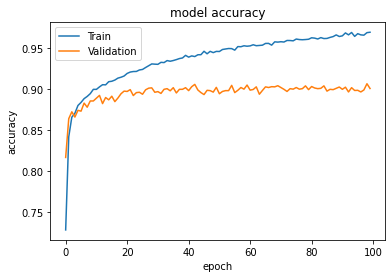

MinMax
accuracy on train set: 0.97252, acc on validation set:0.89810, acc on test set:0.89740
accuracy on small train set: 0.97230, acc on small validation set:0.89450, acc on small test set:0.89400


In [58]:
#display the accuracy 
plt.plot(nn_train.history['accuracy'])
plt.plot(nn_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#make prediction on training, validation set and test set
y_pred_nn_train=nn_model.predict(X_train_minmax).argmax(axis = 1) 
y_pred_nn_val=nn_model.predict(X_val_minmax).argmax(axis = 1) 
y_pred_nn_test=nn_model.predict(X_test_minmax).argmax(axis = 1) 

#make prediction on the small dataset just to have the data
y_pred_nn_train_small=nn_model.predict(X_train_small_minmax).argmax(axis = 1) 
y_pred_nn_val_small=nn_model.predict(X_val_small_minmax).argmax(axis = 1) 
y_pred_nn_test_small=nn_model.predict(X_test_small_minmax).argmax(axis = 1) 

print('MinMax')
print(f'accuracy on train set: {accuracy_score(Y_train,y_pred_nn_train):.5f}, acc on validation set:{accuracy_score(Y_val,y_pred_nn_val):.5f}, acc on test set:{accuracy_score(Y_test,y_pred_nn_test):.5f}')
print(f'accuracy on small train set: {accuracy_score(Y_train_small,y_pred_nn_train_small):.5f}, acc on small validation set:{accuracy_score(Y_val_small,y_pred_nn_val_small):.5f}, acc on small test set:{accuracy_score(Y_test_small,y_pred_nn_test_small):.5f}')